# 5 ML Logit 35:00

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
%matplotlib inline

In [2]:
# ich transformiere mein LinearPredictor/eta einmal mit Logit-Transformation oder mit Probit transformation 
# Logit / sigmoid function
def logit(x):
    return 1 / (1 + np.exp(-x)) # du kannst beta1 als -1 annehmen

# probit

def probit(x):
    return sc.norm.cdf(x) # A normal continuous random variable.



In [4]:
#logit(-3)
#probit(-3)

0.0013498980316300933

In [8]:
# simulierte Daten generieren
np.random.seed(245)
nobs=200          # number of observation
x = np.random.rand(nobs, 1) # Create an array of the given shape and populate it with random samples from a uniform distribution over ``[0, 1)``
                            # يعني اكس رح تكون بين الصفر والواحد
    
# LinearPredictor ist eta هذا مثل حرف الان in Vorlesung->xB هو اكس بيتا بالماتركس
LinearPredictor=  -1 + 5 * x + np.random.logistic(0,1,nobs).reshape(nobs,1) # np.random.logistic-> Draw samples from a logistic distribution with mean=0 and Standard deviation=1.


#print(LinearPredictor)

# ich definiere mein y zwischen 0 und 1
y = np.random.binomial(1,logit(LinearPredictor)) # hier wird Logit-Transformation verwendet استخدمت الدالة اللي عرفتها فوق
#print(y)

In [11]:
# np.random.binomial شرح توليد الارقام بشكل باينوميال

# n, p = 10, .5  # number of trials, probability of each trial
# s = np.random.binomial(n, p, 1000)
# result of flipping a coin 10 times, tested 1000 times.

#s = np.random.binomial(1, 0.5)
#s
#s2 = np.random.binomial(1,logit(LinearPredictor))
#s2
#logit(LinearPredictor)

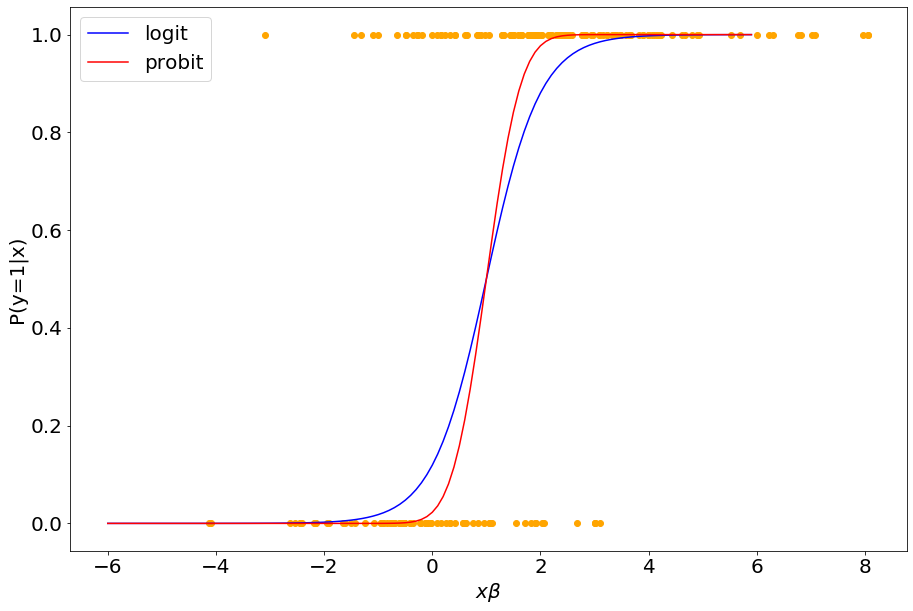

In [12]:
plt.rcParams.update({'font.size': 20})
fig=plt.figure(figsize=(15,10))

plt.scatter(LinearPredictor,y, color = 'orange') # LinearPredictor on x-axis # y as Wahr. on the y-axis

plt.plot(np.arange(-6,6,0.1),logit(-2 + 2*np.arange(-6,6,0.1)),color = 'blue', label='logit') # عالاكسات مجموعة قيم بين الناقص ستة والزائد ستة كل خطوة صفر فاصلو واحد وعالوايات الاحتمالات لهذه القيم بناء على الدالة اللي عرفتها فوق
plt.plot(np.arange(-6,6,0.1),probit(-2 + 2*np.arange(-6,6,0.1)),color = 'red',label='probit')

plt.legend(fontsize=20)
plt.xlabel(r'$x\beta$')
plt.ylabel('P(y=1|x)')
plt.show()

In [16]:
#np.arange(-6,6,0.1)# Return evenly spaced values within a given interval.
#logit(-2 + 2*np.arange(-6,6,0.1))

## je nachdem xB ist, kriege ich die Wahrscheinlichkeit y=1 -> für jeden Wert von x bekomme ich die Wahrscheinlichkeit von y=1

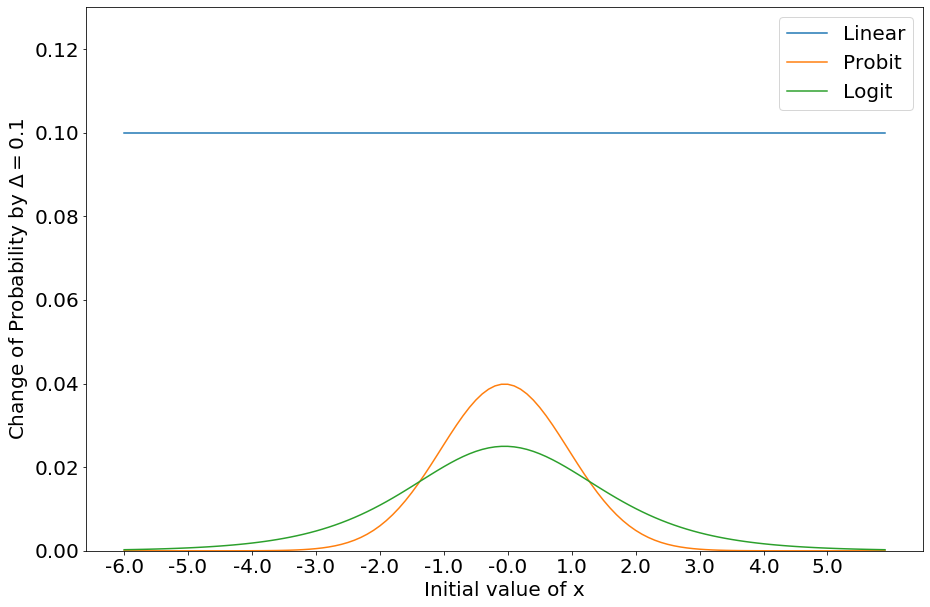

In [17]:
plt.rcParams.update({'font.size': 20})
fig=plt.figure(figsize=(15,10))

x1=np.arange(-6,6,0.1)
x2=np.arange(-5.9,6.1,0.1) # Differenz ist delta=0.1

def logit(x):
    return 1 / (1 + np.exp(-x))

# wie stark meine Wahr. beeinflusst wird, ist von Ausgangspunkt von x abhängig
# wenn x oder beta negative dann e^positiv Wert-> Wahrscheinlichkeit sinkt/ negative Wirkung aber wir wissen nicht wie viel!
# wenn x oder beta positive dann e^negativ Wert-> Wahrscheinlichkeit steigt/ positive Wirkung aber wir wissen nicht wie viel!

delta_logit  = logit(x2)-logit(x1)   # x1 und x2 sind normal verteilt deswegen auch die Differenz normalverteil wird-> so dass die Differenz ist Einfluss von delta=0.1
delta_probit = probit(x2)-probit(x1)
delta_linear = x2-x1         # egal welche Werte von x habe, meine Wahrscheinlichkeit verändert sich um 0.1 اي طبعا لانه بي واحد مبلش اقل من الثاني بصفر فاصلة واحد. 


plt.plot(delta_linear, label='Linear')
plt.plot(delta_probit, label='Probit')
plt.plot(delta_logit,  label='Logit')

plt.xticks(range(120)[0::10],np.round(x1,1)[0::10])
plt.ylabel(r'Change of Probability by $\Delta=0.1$')
plt.xlabel('Initial value of x')
plt.ylim((0,0.13))

plt.legend()